In [7]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.regression.regression_models as modl
import source.trading_strategies.trading_strategy_helpers as tsh
from source.regression.configs_gw import WITHOUT_LOOKAHEAD, ALL, MINIMAL_SETTING, WITHOUT_LOOKAHEAD_AR, ALL_COVARIATES_NON_AR, ALL_COVARIATES_AR,COMPLETED
data = dp.prepare_data(uselog=True)

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


1965-01-01 00:00:00
[PCR] 1965-01-01 selected k=1 (val R2os vs HA=0.0013)
1965-02-01 00:00:00
[PCR] 1965-02-01 selected k=1 (val R2os vs HA=0.0002)
1965-03-01 00:00:00
[PCR] 1965-03-01 selected k=1 (val R2os vs HA=0.0004)
1965-04-01 00:00:00
[PCR] 1965-04-01 selected k=1 (val R2os vs HA=-0.0014)
1965-05-01 00:00:00
[PCR] 1965-05-01 selected k=1 (val R2os vs HA=-0.0024)
1965-06-01 00:00:00
[PCR] 1965-06-01 selected k=1 (val R2os vs HA=-0.0057)
1965-07-01 00:00:00
[PCR] 1965-07-01 selected k=1 (val R2os vs HA=-0.0055)
1965-08-01 00:00:00
[PCR] 1965-08-01 selected k=1 (val R2os vs HA=-0.0052)
1965-09-01 00:00:00
[PCR] 1965-09-01 selected k=1 (val R2os vs HA=-0.0084)
1965-10-01 00:00:00
[PCR] 1965-10-01 selected k=1 (val R2os vs HA=-0.0096)
1965-11-01 00:00:00
[PCR] 1965-11-01 selected k=1 (val R2os vs HA=-0.0092)
1965-12-01 00:00:00
[PCR] 1965-12-01 selected k=1 (val R2os vs HA=-0.0096)
1966-01-01 00:00:00
[PCR] 1966-01-01 selected k=1 (val R2os vs HA=-0.0088)
1966-02-01 00:00:00
[PCR] 19

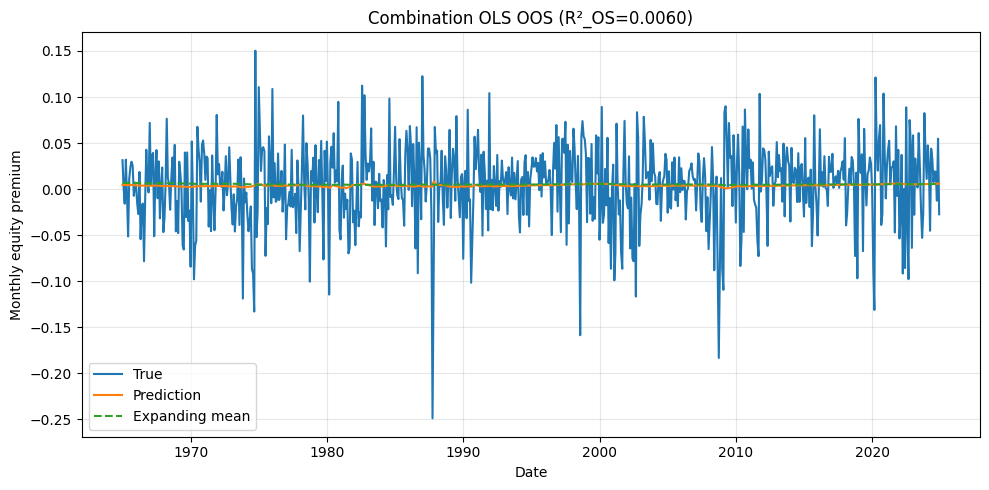

Saved new file: ../../Data/ModelData/oos_predictions.csv


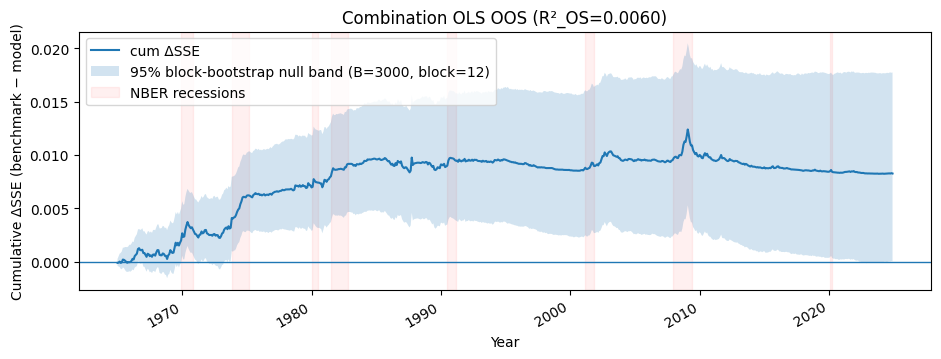

In [8]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.pcr_oos(data, variables=WITHOUT_LOOKAHEAD_AR, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)",
min_feat_coverage= 0.6
)
modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="pcr_without_lookahead_ar")


In [9]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.pcr_oos(data, variables=MINIMAL_SETTING, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)",
min_feat_coverage= 0.6
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="pcr_minimal_setting")

1965-01-01 00:00:00
[PCR] 1965-01-01 selected k=1 (val R2os vs HA=-0.0009)
1965-02-01 00:00:00
[PCR] 1965-02-01 selected k=1 (val R2os vs HA=-0.0021)
1965-03-01 00:00:00
[PCR] 1965-03-01 selected k=1 (val R2os vs HA=-0.0018)
1965-04-01 00:00:00
[PCR] 1965-04-01 selected k=1 (val R2os vs HA=-0.0042)
1965-05-01 00:00:00
[PCR] 1965-05-01 selected k=1 (val R2os vs HA=-0.0054)
1965-06-01 00:00:00
[PCR] 1965-06-01 selected k=1 (val R2os vs HA=-0.0104)
1965-07-01 00:00:00
[PCR] 1965-07-01 selected k=1 (val R2os vs HA=-0.0110)
1965-08-01 00:00:00
[PCR] 1965-08-01 selected k=1 (val R2os vs HA=-0.0096)
1965-09-01 00:00:00
[PCR] 1965-09-01 selected k=1 (val R2os vs HA=-0.0156)
1965-10-01 00:00:00
[PCR] 1965-10-01 selected k=1 (val R2os vs HA=-0.0172)
1965-11-01 00:00:00
[PCR] 1965-11-01 selected k=1 (val R2os vs HA=-0.0175)
1965-12-01 00:00:00
[PCR] 1965-12-01 selected k=1 (val R2os vs HA=-0.0182)
1966-01-01 00:00:00
[PCR] 1966-01-01 selected k=1 (val R2os vs HA=-0.0165)
1966-02-01 00:00:00
[PCR]

1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00


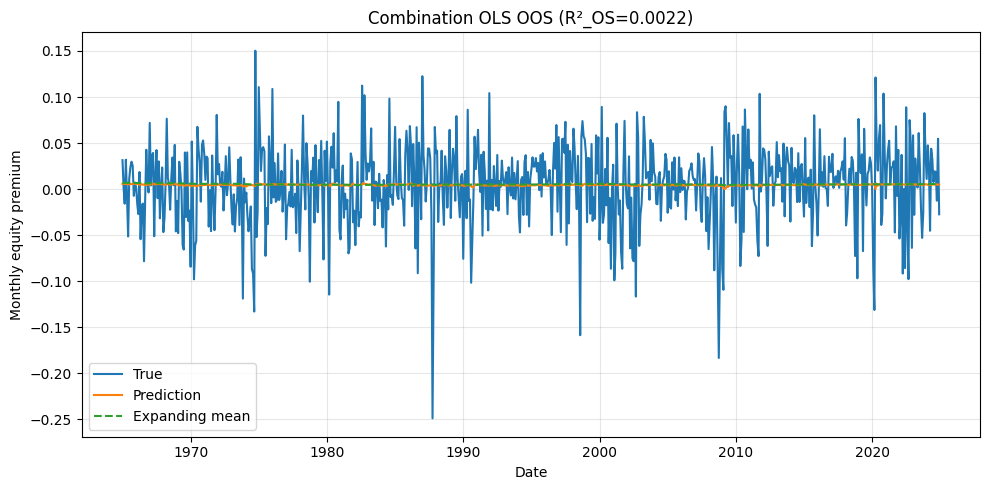

Appended model results to: ../../Data/ModelData/oos_predictions.csv


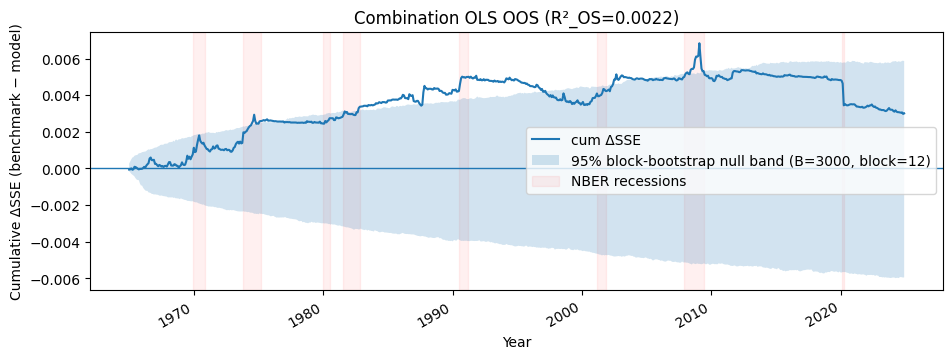

In [10]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=
    WITHOUT_LOOKAHEAD_AR, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="combination_without_lookahead_ar")

1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00


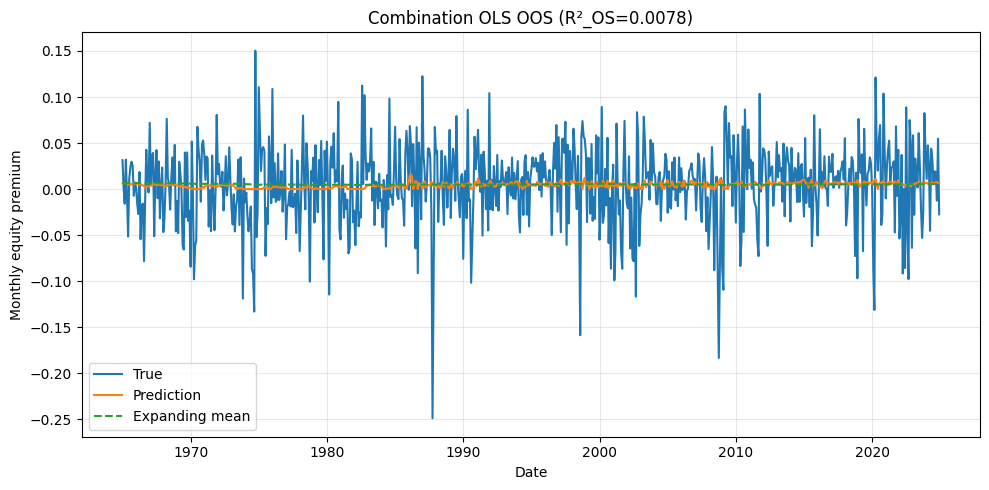

Appended model results to: ../../Data/ModelData/oos_predictions.csv


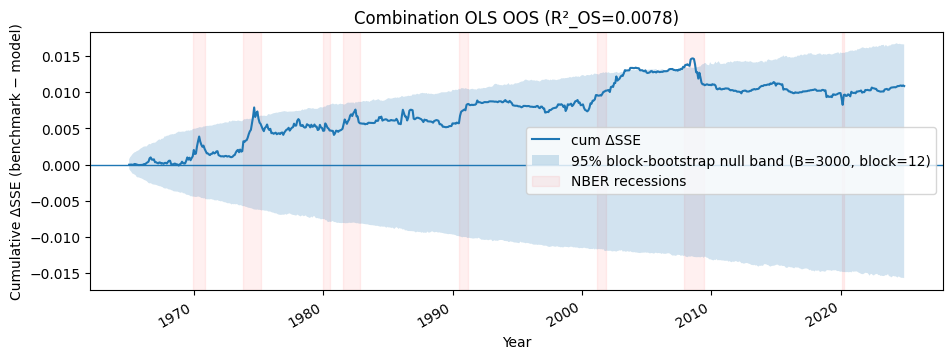

In [11]:

from importlib import reload
reload(tsh)

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables= MINIMAL_SETTING, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",min_train = 24
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="combination_minimal_setting_v2")


In [12]:
# Pick the monthly variables you actually have in `data`:

monthly_vars = [v for v in WITHOUT_LOOKAHEAD if v in data.columns]

ranking = modl.rank_monthly_predictors(
    data,
    monthly_vars=monthly_vars,
    start_date="1927-01-01",
    start_oos="1965-01-01",
    lag=1,
    quiet=True,  # set False to see printed ranking
      ct_cutoff=True,
)


percentage of negative forecasts before truncation: 0.76%
Manually calculated R2: -0.003569289482602711
evaluate_oos calculated R2 CT: -0.003569289482602711
Manually calculated Stats: {'mean': -0.0018486627626121924, 'std': 0.0156473319030766, 'lower': -0.030357531761180657, 'upper': 0.030592848842788754}
evaluate_oos calculated R2 WCT: -0.005506742433272649
Stats WCT: {'mean': -0.0038875622122930944, 'std': 0.01619324360529701, 'lower': -0.03416720539316136, 'upper': 0.02967030370059728}
percentage of negative forecasts before truncation: 4.25%
Manually calculated R2: -0.026195497513151977
evaluate_oos calculated R2 CT: -0.026195497513151977
Manually calculated Stats: {'mean': -0.025227013769921043, 'std': 0.01814249612693556, 'lower': -0.06308248161735622, 'upper': -0.0002693600912537186}
evaluate_oos calculated R2 WCT: -0.027436063765937435
Stats WCT: {'mean': -0.026567804432451315, 'std': 0.0186846567294027, 'lower': -0.06432065228560914, 'upper': -0.00035190664025465835}
percentag

[Chronos-2] Loading amazon/chronos-2 on M freq with 28 covariates...


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


1965-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00


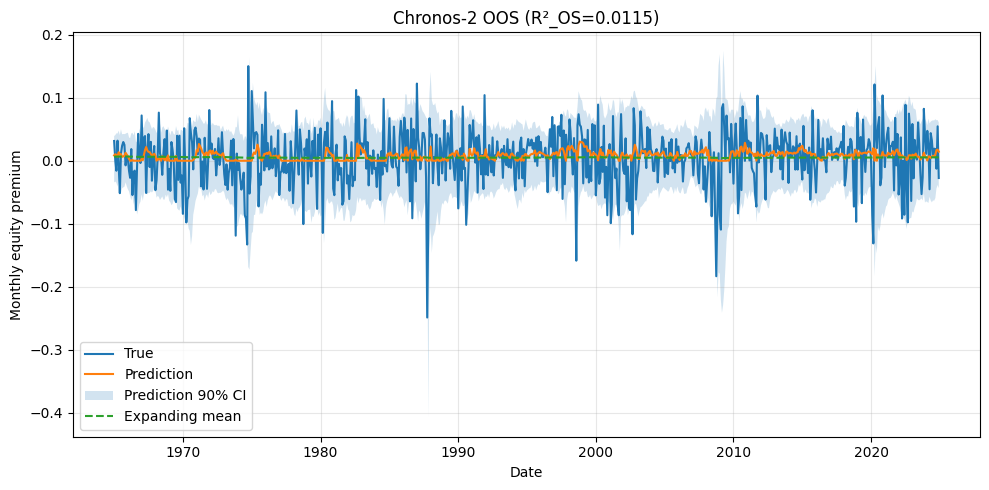

Appended model results to: ../../Data/ModelData/oos_predictions.csv


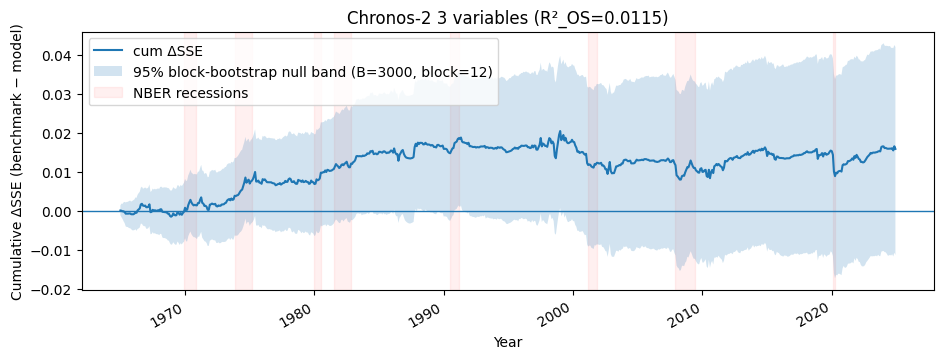

In [13]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data[data.index>= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
    ctx_min=240, ct_cutoff=True, quiet=False, mode = "mean", freq="M",
    ci = 0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 3 variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube",
)

tsh.save_oos_results(dates_m, y_true_m, y_pred_m, model_name="chronos2_without_lookahead")


[Chronos-2] Loading amazon/chronos-2 on M freq with 3 covariates...


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


1965-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00


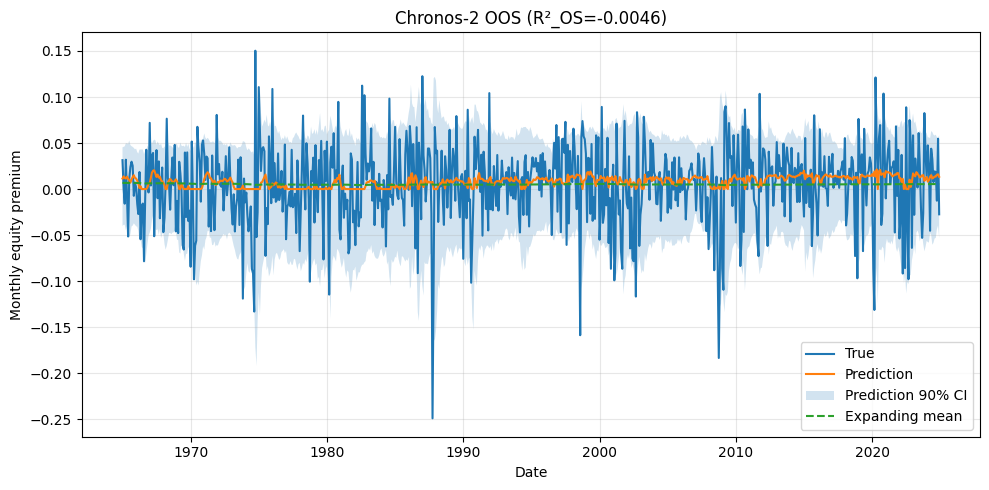

Appended model results to: ../../Data/ModelData/oos_predictions.csv


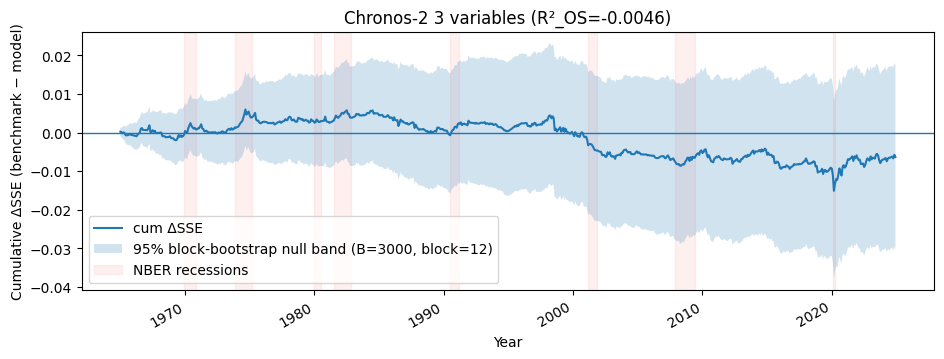

In [14]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data[data.index>= "1927-01-01"], covariates=MINIMAL_SETTING, start_oos="1965-01-01",
    ctx_min=240, ct_cutoff=True, quiet=False, mode = "mean", freq="M",
    ci = 0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 3 variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube",
)

tsh.save_oos_results(dates_m, y_true_m, y_pred_m, model_name="chronos2_minimal_setting")


[Chronos-2] Loading amazon/chronos-2 on M freq with 0 covariates...


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


1965-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00


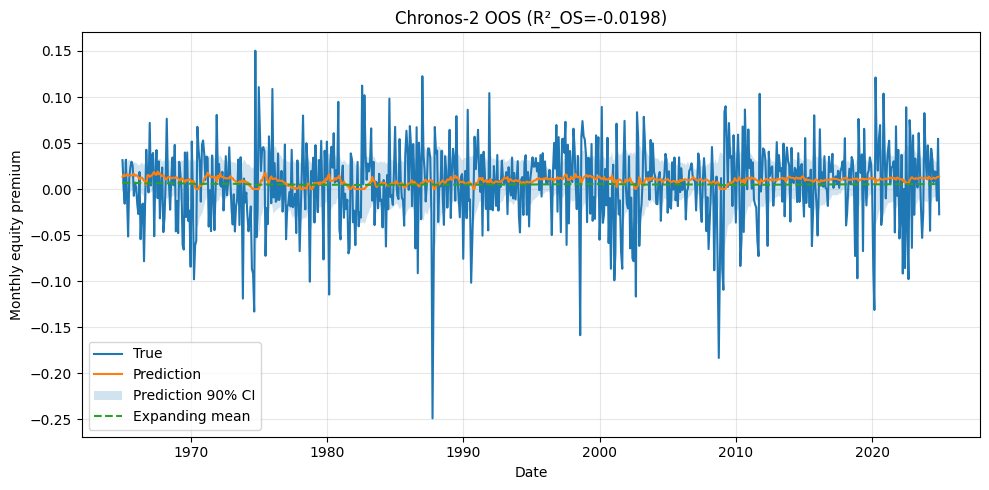

Appended model results to: ../../Data/ModelData/oos_predictions.csv


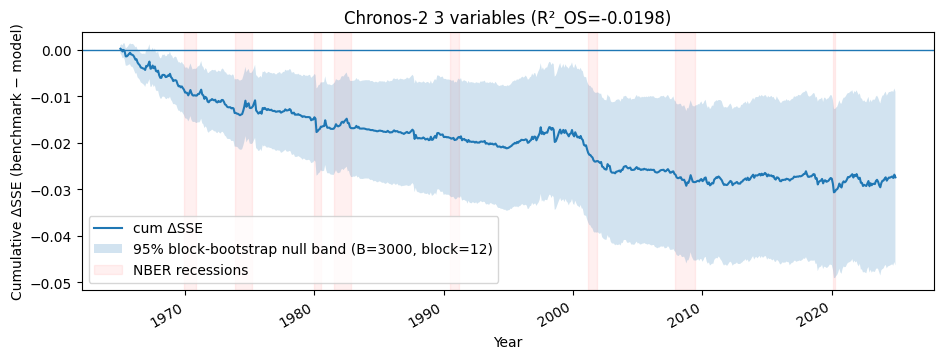

In [15]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data[data.index>= "1927-01-01"], covariates=(), start_oos="1965-01-01",
    ctx_min=240, ct_cutoff=True, quiet=False, mode = "mean", freq="M",
    ci = 0.5
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 3 variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube",
)
tsh.save_oos_results(dates_m, y_true_m, y_pred_m, model_name="chronos2_no_covariates")

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
	Quantiles to be predicted ([0.05, 0.5, 0.95]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Quantiles to be predicted ([0.05, 0.5, 0.95]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Quantiles to be predicted ([0.05, 0.5, 0.9

percentage of negative forecasts before truncation: 8.19%
Manually calculated R2: -0.0009941868582792335
evaluate_oos calculated R2 CT: -0.0009941868582792335
Manually calculated Stats: {'mean': -0.001274452845838583, 'std': 0.00646983722283986, 'lower': -0.01361418552305561, 'upper': 0.01196586724864623}
evaluate_oos calculated R2 WCT: -0.0032758976548181717
Stats WCT: {'mean': -0.0032619158889219024, 'std': 0.007751077781996025, 'lower': -0.01864112449916952, 'upper': 0.012032918960411889}


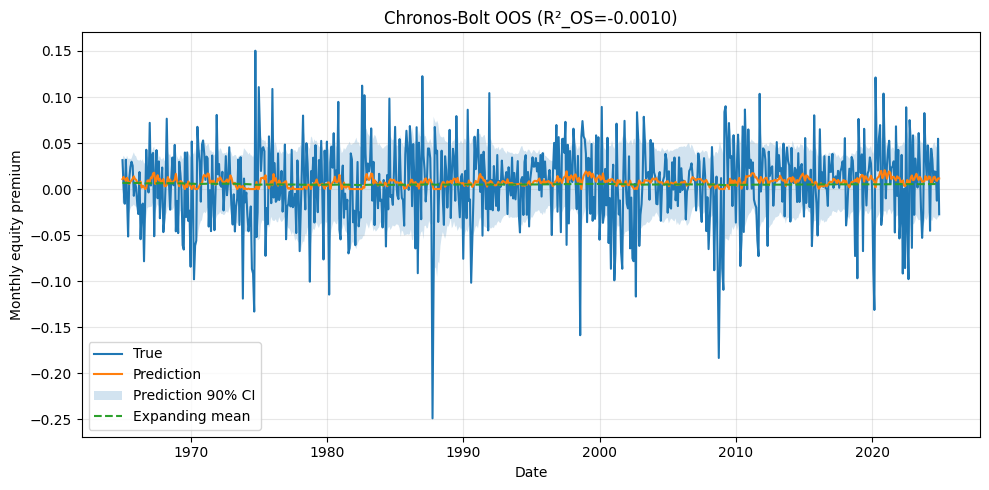

Appended model results to: ../../Data/ModelData/oos_predictions.csv


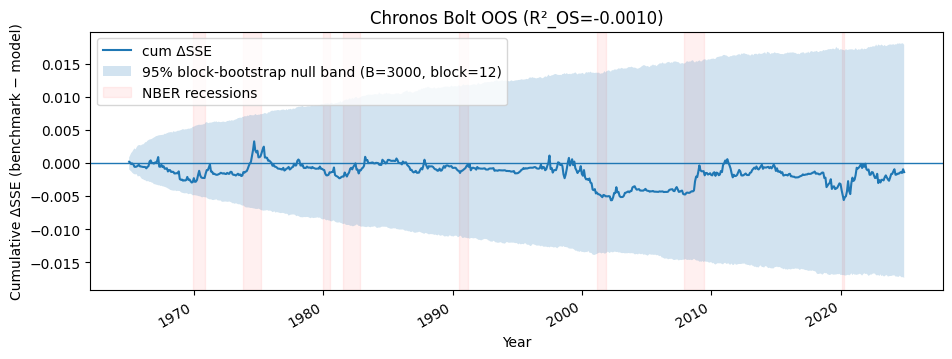

In [16]:
r2_c, stats_c, y_true_c, y_pred_c, dates_c, y_lower, y_upper, HA_c = modl.chronos_oos(
    data, start_oos="1965-01-01", quiet=True, ct_cutoff=True, freq='M', mode="mean", ci=0.9
)
modl.plot_oos(
    y_true_c, y_pred_c, HA_c, dates=dates_c, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-Bolt OOS (R²_OS={r2_c:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_c, y_pred_c, HA_c,
    dates=dates_c,
    title=f"Chronos Bolt OOS (R²_OS={r2_c:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
tsh.save_oos_results(dates_c, y_true_c, y_pred_c, model_name="Chronos_Bolt_forecast")


In [17]:
# r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
#     data,
#     variables=MINIMAL_SETTING,
#     start_oos="1965-01-01",
#     lag=1,
#     min_train=120,
#     ct_cutoff=True,
#     quiet=False,
#     model_params='2.5',  # or just omit this argument,
#     )

# modl.plot_oos(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     ylabel="Monthly equity premium"
# )
# fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab,
#     dates=dates_tabpfn,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     add_band=True,
#     B=3000,
#     block=12,
#     seed=1,
# )
# tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_minimal_setting")

In [18]:


# r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
#     data,
#     variables=WITHOUT_LOOKAHEAD_AR,
#     start_oos="1965-01-01",
#     lag=1,
#     min_train=120,
#     ct_cutoff=True,
#     quiet=False,
#     model_params='2.5',  # or just omit this argument,
#                             )

# modl.plot_oos(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     ylabel="Monthly equity premium"
# )
# fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab,
#     dates=dates_tabpfn,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     add_band=True,
#     B=3000,
#     block=12,
#     seed=1,
# )
# tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_without_lookahead_ar")

In [19]:


# r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
#     data,
#     variables=WITHOUT_LOOKAHEAD_AR,
#     start_oos="1965-01-01",
#     lag = 3,
#     min_train=120,
#     ct_cutoff=True,
#     quiet=False,
#     model_params='2.5',  # or just omit this argument,
#     )

# modl.plot_oos(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     ylabel="Monthly equity premium"
# )
# fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab,
#     dates=dates_tabpfn,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     add_band=True,
#     B=3000,
#     block=12,
#     seed=1,
# )

# tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_without_lookahead_ar_lag3")

In [20]:


# r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
#     data,
#     variables=("equity_premium",),
#     start_oos="1965-01-01",
#     lag=100,
#     min_train=120,
#     ct_cutoff=True,
#     quiet=False,
#     model_params='2.5',  # or just omit this argument,
#     )

# modl.plot_oos(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     ylabel="Monthly equity premium"
# )
# fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab,
#     dates=dates_tabpfn,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     add_band=True,
#     B=3000,
#     block=12,
#     seed=1,
# )
# tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_autoregressive_benchmark")

In [21]:


# r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
#     data,
#     variables=WITHOUT_LOOKAHEAD_AR,
#     start_oos="1965-01-01",
#     lag=8,
#     min_train=120,
#     ct_cutoff=True,
#     quiet=False,
#     model_params='2.5',  # or just omit this argument,
#     )

# modl.plot_oos(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     ylabel="Monthly equity premium"
# )
# fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
#     y_true_tabpfn, y_pred_tabpfn, HA_Tab,
#     dates=dates_tabpfn,
#     title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
#     add_band=True,
#     B=3000,
#     block=12,
#     seed=1,
# )

# tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_without_lookahead_ar_lag8")


In [22]:
r2_values_12 = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="2000-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,12,False,False)
    )


    r2_values_12.append(r2_m)
sum = 0
for i in r2_values_12:
    sum += i
avg_r2_1 = sum / len(r2_values_12)
print("Avg R2 with block size 1:", avg_r2_1)

1


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.00%
Manually calculated R2: -0.024417769072447637
evaluate_oos calculated R2 CT: -0.024417769072447637
Manually calculated Stats: {'mean': -0.023685949266394127, 'std': 0.013957108112120064, 'lower': -0.05088874486108591, 'upper': 0.0035875167774669014}
evaluate_oos calculated R2 WCT: -0.05927549020305767
Stats WCT: {'mean': -0.060249773327553, 'std': 0.026274090439248873, 'lower': -0.11986050420663336, 'upper': -0.015779367671703775}
2


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 8.67%
Manually calculated R2: -0.020149002091502055
evaluate_oos calculated R2 CT: -0.020149002091502055
Manually calculated Stats: {'mean': -0.0220818315696623, 'std': 0.01583435437997846, 'lower': -0.05212855049121517, 'upper': 0.008796344014449188}
evaluate_oos calculated R2 WCT: -0.03284616532293949
Stats WCT: {'mean': -0.0371321570956744, 'std': 0.025537473827096813, 'lower': -0.08795392810704783, 'upper': 0.011401551372240411}
3


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.33%
Manually calculated R2: -0.03358268323168723
evaluate_oos calculated R2 CT: -0.03358268323168723
Manually calculated Stats: {'mean': -0.02774040918726149, 'std': 0.01764153866264211, 'lower': -0.05879633409780253, 'upper': 0.008930670578626045}
evaluate_oos calculated R2 WCT: -0.050845735912586454
Stats WCT: {'mean': -0.03741909488262953, 'std': 0.022118892631128297, 'lower': -0.07830487973424662, 'upper': 0.008321345460913617}
4


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.33%
Manually calculated R2: -0.0007914656478864579
evaluate_oos calculated R2 CT: -0.0007914656478864579
Manually calculated Stats: {'mean': 0.004987664545029598, 'std': 0.015267113085201033, 'lower': -0.023736913735466908, 'upper': 0.03560083804370166}
evaluate_oos calculated R2 WCT: 0.016695633008448896
Stats WCT: {'mean': 0.022559058035798694, 'std': 0.019094122391073415, 'lower': -0.014717423420348484, 'upper': 0.06252596138073227}
5


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 8.00%
Manually calculated R2: -0.006393519263539593
evaluate_oos calculated R2 CT: -0.006393519263539593
Manually calculated Stats: {'mean': -0.007233938483715437, 'std': 0.011763522416321432, 'lower': -0.029426134627405127, 'upper': 0.016551731391499232}
evaluate_oos calculated R2 WCT: -0.013017422070450424
Stats WCT: {'mean': -0.014723942007091057, 'std': 0.014490331561034787, 'lower': -0.044399413926241395, 'upper': 0.014522840076454536}
6


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 11.33%
Manually calculated R2: -0.00882793456248332
evaluate_oos calculated R2 CT: -0.00882793456248332
Manually calculated Stats: {'mean': -0.007331145251569224, 'std': 0.017266647439268444, 'lower': -0.039241507749568444, 'upper': 0.027195625731526}
evaluate_oos calculated R2 WCT: -0.014649084289456438
Stats WCT: {'mean': -0.013615483640987882, 'std': 0.01906932609817003, 'lower': -0.04871282502711975, 'upper': 0.026202235732250355}
7


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.33%
Manually calculated R2: -0.008166950187730837
evaluate_oos calculated R2 CT: -0.008166950187730837
Manually calculated Stats: {'mean': -0.0044703134177104115, 'std': 0.018561730732258173, 'lower': -0.04102979328254471, 'upper': 0.029295160684560253}
evaluate_oos calculated R2 WCT: -0.017244043254624364
Stats WCT: {'mean': -0.015312910154470494, 'std': 0.020982450093673614, 'lower': -0.05697974883375198, 'upper': 0.023109648346050508}
8


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 11.00%
Manually calculated R2: -0.014501974893156744
evaluate_oos calculated R2 CT: -0.014501974893156744
Manually calculated Stats: {'mean': -0.013956131454786934, 'std': 0.012860352854094504, 'lower': -0.03941980839975473, 'upper': 0.010824756470480559}
evaluate_oos calculated R2 WCT: -0.026996268966737347
Stats WCT: {'mean': -0.0280312679962136, 'std': 0.016401177364277028, 'lower': -0.06186031604360291, 'upper': 0.002067690081848861}
9


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.67%
Manually calculated R2: -0.016856220609205996
evaluate_oos calculated R2 CT: -0.016856220609205996
Manually calculated Stats: {'mean': -0.01787613600373119, 'std': 0.013400415246392777, 'lower': -0.04453875242646228, 'upper': 0.007219374824920077}
evaluate_oos calculated R2 WCT: -0.03410933733673427
Stats WCT: {'mean': -0.03650841426558028, 'std': 0.016510228755090384, 'lower': -0.06952427581532343, 'upper': -0.005510649948976471}
10


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.33%
Manually calculated R2: -0.015275221440763653
evaluate_oos calculated R2 CT: -0.015275221440763653
Manually calculated Stats: {'mean': -0.012467967290261098, 'std': 0.014515923386430341, 'lower': -0.039133471352061286, 'upper': 0.01572368622719263}
evaluate_oos calculated R2 WCT: -0.0241409909058663
Stats WCT: {'mean': -0.02299754058953749, 'std': 0.01761733535089817, 'lower': -0.06335375326678917, 'upper': 0.008405722773732542}
11


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.33%
Manually calculated R2: -0.03284758297710488
evaluate_oos calculated R2 CT: -0.03284758297710488
Manually calculated Stats: {'mean': -0.03047539679488643, 'std': 0.015970104327786026, 'lower': -0.06258994286605567, 'upper': 0.0016750402697817553}
evaluate_oos calculated R2 WCT: -0.04764992585582073
Stats WCT: {'mean': -0.0465093854254138, 'std': 0.021282744858897407, 'lower': -0.0922223496647008, 'upper': -0.0068011467162036885}
12


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 7.67%
Manually calculated R2: -0.02214050901406739
evaluate_oos calculated R2 CT: -0.02214050901406739
Manually calculated Stats: {'mean': -0.020281685646534847, 'std': 0.012658970148042903, 'lower': -0.04359724929665508, 'upper': 0.005222106821325083}
evaluate_oos calculated R2 WCT: -0.02167533820350198
Stats WCT: {'mean': -0.020224605556296384, 'std': 0.01723496081293755, 'lower': -0.05663779287845838, 'upper': 0.011864115520899944}
13


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 11.67%
Manually calculated R2: -0.030599809312500836
evaluate_oos calculated R2 CT: -0.030599809312500836
Manually calculated Stats: {'mean': -0.03253668613799589, 'std': 0.018175737571179816, 'lower': -0.06930131203797074, 'upper': 0.0018313009757577987}
evaluate_oos calculated R2 WCT: -0.05615694902586177
Stats WCT: {'mean': -0.06074017025294833, 'std': 0.02280928006465747, 'lower': -0.1103422693052257, 'upper': -0.01918938445420403}
14


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 12.67%
Manually calculated R2: -0.07687321426690907
evaluate_oos calculated R2 CT: -0.07687321426690907
Manually calculated Stats: {'mean': -0.07473556210984361, 'std': 0.06065150629641778, 'lower': -0.2319395644209577, 'upper': 0.004236907212274388}
evaluate_oos calculated R2 WCT: -0.10195047173487248
Stats WCT: {'mean': -0.10449628588057233, 'std': 0.06175423799760129, 'lower': -0.24987113078715664, 'upper': -0.01265900160606265}
15


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 13.67%
Manually calculated R2: -0.07346583777714089
evaluate_oos calculated R2 CT: -0.07346583777714089
Manually calculated Stats: {'mean': -0.07693577482545115, 'std': 0.03189792798679572, 'lower': -0.14328102446938012, 'upper': -0.02154067749736436}
evaluate_oos calculated R2 WCT: -0.09674711632622457
Stats WCT: {'mean': -0.103372493746688, 'std': 0.03359883793970442, 'lower': -0.17484104230664194, 'upper': -0.043362073203663754}
16


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.67%
Manually calculated R2: -0.011543281288244112
evaluate_oos calculated R2 CT: -0.011543281288244112
Manually calculated Stats: {'mean': -0.013274676927161848, 'std': 0.014590703533325929, 'lower': -0.0443793513883782, 'upper': 0.013856117844706814}
evaluate_oos calculated R2 WCT: -0.03852631495163594
Stats WCT: {'mean': -0.043262807530040005, 'std': 0.024076899073880578, 'lower': -0.09343649153804232, 'upper': -0.0006426971172019922}
17


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.33%
Manually calculated R2: -0.03861751485665765
evaluate_oos calculated R2 CT: -0.03861751485665765
Manually calculated Stats: {'mean': -0.03491539356205941, 'std': 0.02226642231980558, 'lower': -0.07995728506979688, 'upper': 0.010851573517639905}
evaluate_oos calculated R2 WCT: -0.07688350352459872
Stats WCT: {'mean': -0.07932667345102869, 'std': 0.04731514943243145, 'lower': -0.1834600538301784, 'upper': -0.007464143538843298}
18


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 8.67%
Manually calculated R2: -0.021941255084940048
evaluate_oos calculated R2 CT: -0.021941255084940048
Manually calculated Stats: {'mean': -0.021973094154099388, 'std': 0.014910961954987048, 'lower': -0.05062693589891518, 'upper': 0.007492984083909543}
evaluate_oos calculated R2 WCT: -0.08824216710160271
Stats WCT: {'mean': -0.09211355652588862, 'std': 0.05349207864644077, 'lower': -0.2142532794093702, 'upper': -0.015048123552224225}
19


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.00%
Manually calculated R2: -0.0086593059679545
evaluate_oos calculated R2 CT: -0.0086593059679545
Manually calculated Stats: {'mean': -0.007033242567299215, 'std': 0.01911782684560925, 'lower': -0.04324286376192432, 'upper': 0.03147151981532531}
evaluate_oos calculated R2 WCT: -0.008660753997178139
Stats WCT: {'mean': -0.007443158917701904, 'std': 0.02477288844663342, 'lower': -0.05640864347055221, 'upper': 0.03944200021605372}
Avg R2 with block size 1: -0.024507950081364364


In [23]:
r2_values_12 = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="2000-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,12,True,True)
    )


    r2_values_12.append(r2_m)
sum = 0
for i in r2_values_12:
    sum += i
avg_r2_1 = sum / len(r2_values_12)
print("Avg R2 with block size 1:", avg_r2_1)

1


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.00%
Manually calculated R2: -0.0004303400945280256
evaluate_oos calculated R2 CT: -0.0004303400945280256
Manually calculated Stats: {'mean': 0.0018871735624000647, 'std': 0.011619880715922633, 'lower': -0.01910561700392771, 'upper': 0.02519143604251669}
evaluate_oos calculated R2 WCT: -0.020897141653797302
Stats WCT: {'mean': -0.01948473672517362, 'std': 0.029669020323113665, 'lower': -0.07965430950345616, 'upper': 0.041967530507485355}
2


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 8.67%
Manually calculated R2: -0.010128225367571408
evaluate_oos calculated R2 CT: -0.010128225367571408
Manually calculated Stats: {'mean': -0.006000153506717817, 'std': 0.013132586444662692, 'lower': -0.030938195702435983, 'upper': 0.020418099717591048}
evaluate_oos calculated R2 WCT: -0.027549697436347165
Stats WCT: {'mean': -0.02424182322632267, 'std': 0.024538959507253162, 'lower': -0.07126955727429615, 'upper': 0.026515937228328373}
3


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.67%
Manually calculated R2: -0.01829559955411786
evaluate_oos calculated R2 CT: -0.01829559955411786
Manually calculated Stats: {'mean': -0.016474377232439424, 'std': 0.015774483960643994, 'lower': -0.04703850230497587, 'upper': 0.014458795206263841}
evaluate_oos calculated R2 WCT: -0.05184387918354738
Stats WCT: {'mean': -0.048567796815649295, 'std': 0.029561321313262477, 'lower': -0.11229110831557532, 'upper': 0.010076693212881824}
4


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.67%
Manually calculated R2: -0.017185506397376704
evaluate_oos calculated R2 CT: -0.017185506397376704
Manually calculated Stats: {'mean': -0.014426674272452528, 'std': 0.012677262900094088, 'lower': -0.04054298560627926, 'upper': 0.010929914047640472}
evaluate_oos calculated R2 WCT: -0.044367030830327
Stats WCT: {'mean': -0.04121863984933883, 'std': 0.032070069641248984, 'lower': -0.1082524082616287, 'upper': 0.020743092268886994}
5


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 11.00%
Manually calculated R2: -0.009231942331090925
evaluate_oos calculated R2 CT: -0.009231942331090925
Manually calculated Stats: {'mean': -0.0049014383682316216, 'std': 0.01403364108981688, 'lower': -0.03366775297739562, 'upper': 0.022701288997801827}
evaluate_oos calculated R2 WCT: -0.04985827374237739
Stats WCT: {'mean': -0.04512896433025227, 'std': 0.04536604319301961, 'lower': -0.15110109029814503, 'upper': 0.03402863903266747}
6


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.33%
Manually calculated R2: -0.020497166602582162
evaluate_oos calculated R2 CT: -0.020497166602582162
Manually calculated Stats: {'mean': -0.01966494626802333, 'std': 0.012807374703227849, 'lower': -0.04536856306634676, 'upper': 0.004640986537972438}
evaluate_oos calculated R2 WCT: -0.03498972275014811
Stats WCT: {'mean': -0.03475044719010048, 'std': 0.02450216228539042, 'lower': -0.07897276978456365, 'upper': 0.017054883778069435}
7


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 11.00%
Manually calculated R2: -0.012273327409890733
evaluate_oos calculated R2 CT: -0.012273327409890733
Manually calculated Stats: {'mean': -0.009693391479369096, 'std': 0.013297195238685422, 'lower': -0.03551289262470865, 'upper': 0.01786235760333257}
evaluate_oos calculated R2 WCT: -0.031491145270036824
Stats WCT: {'mean': -0.029349951943359442, 'std': 0.02167681911329979, 'lower': -0.0700738661167, 'upper': 0.01528133244504275}
8


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.67%
Manually calculated R2: 0.014513740886545556
evaluate_oos calculated R2 CT: 0.014513740886545556
Manually calculated Stats: {'mean': 0.018324967550754717, 'std': 0.013084720770039198, 'lower': -0.007619606233623494, 'upper': 0.04281412959585951}
evaluate_oos calculated R2 WCT: -0.002380580563142498
Stats WCT: {'mean': 0.00042876725062813005, 'std': 0.021709760422462275, 'lower': -0.04246863740444053, 'upper': 0.04491982504599804}
9


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.33%
Manually calculated R2: -0.015716268371075426
evaluate_oos calculated R2 CT: -0.015716268371075426
Manually calculated Stats: {'mean': -0.014961837472249929, 'std': 0.014755690933474688, 'lower': -0.045145421134351944, 'upper': 0.013992011659920093}
evaluate_oos calculated R2 WCT: -0.006416258767384608
Stats WCT: {'mean': -0.006378487006158572, 'std': 0.029774862028580516, 'lower': -0.05763569982157112, 'upper': 0.05348581121493058}
10


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.33%
Manually calculated R2: -0.011185620665711493
evaluate_oos calculated R2 CT: -0.011185620665711493
Manually calculated Stats: {'mean': -0.011159699801197185, 'std': 0.014668994491659712, 'lower': -0.0392894100735964, 'upper': 0.01806329830521672}
evaluate_oos calculated R2 WCT: -0.027648068167796858
Stats WCT: {'mean': -0.028146389542771218, 'std': 0.0253875403674576, 'lower': -0.07729451754315764, 'upper': 0.02128849410990938}
11


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 7.67%
Manually calculated R2: -0.01492017470625906
evaluate_oos calculated R2 CT: -0.01492017470625906
Manually calculated Stats: {'mean': -0.011414850211403132, 'std': 0.010860816057134967, 'lower': -0.03184209319302432, 'upper': 0.00871631577812737}
evaluate_oos calculated R2 WCT: -0.03720850805701614
Stats WCT: {'mean': -0.0362618587471167, 'std': 0.019523066080717123, 'lower': -0.07835021930452846, 'upper': -0.001768257110913037}
12


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.67%
Manually calculated R2: -0.022580557122880096
evaluate_oos calculated R2 CT: -0.022580557122880096
Manually calculated Stats: {'mean': -0.01979811490309252, 'std': 0.012285970626997161, 'lower': -0.04290095408565867, 'upper': 0.0039005378028955867}
evaluate_oos calculated R2 WCT: -0.028306594459530876
Stats WCT: {'mean': -0.02693568136871219, 'std': 0.022045079268046323, 'lower': -0.06911449242485167, 'upper': 0.01717633462079577}
13


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 7.67%
Manually calculated R2: -0.00041592449787253294
evaluate_oos calculated R2 CT: -0.00041592449787253294
Manually calculated Stats: {'mean': 0.0023018826367266197, 'std': 0.012164568939179438, 'lower': -0.02307312067490259, 'upper': 0.025953393004191617}
evaluate_oos calculated R2 WCT: -0.009173098104215072
Stats WCT: {'mean': -0.0063743532369673166, 'std': 0.025083265732715607, 'lower': -0.05286809813567226, 'upper': 0.045287297827946056}
14


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.67%
Manually calculated R2: -0.008249023010161949
evaluate_oos calculated R2 CT: -0.008249023010161949
Manually calculated Stats: {'mean': -0.00445077580528379, 'std': 0.015582335095263638, 'lower': -0.034415536658426955, 'upper': 0.023993852137355}
evaluate_oos calculated R2 WCT: -0.008461753309774833
Stats WCT: {'mean': -0.004528969868924455, 'std': 0.024305902084259538, 'lower': -0.04906998041760056, 'upper': 0.044804422315486335}
15


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.00%
Manually calculated R2: -0.020064541838756167
evaluate_oos calculated R2 CT: -0.020064541838756167
Manually calculated Stats: {'mean': -0.02017243698211602, 'std': 0.014208067453742312, 'lower': -0.04727168794169952, 'upper': 0.007809759162798916}
evaluate_oos calculated R2 WCT: -0.03400246665921425
Stats WCT: {'mean': -0.03477713902421112, 'std': 0.02236892579803844, 'lower': -0.08171779332245113, 'upper': 0.009065889831875456}
16


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.33%
Manually calculated R2: -0.01195644534997431
evaluate_oos calculated R2 CT: -0.01195644534997431
Manually calculated Stats: {'mean': -0.009032185284388886, 'std': 0.014444241818125907, 'lower': -0.03929624379111778, 'upper': 0.01826539921011177}
evaluate_oos calculated R2 WCT: -0.015281005282266724
Stats WCT: {'mean': -0.013250866282197318, 'std': 0.02322577468241513, 'lower': -0.0572925806240516, 'upper': 0.03367169507452499}
17


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 10.00%
Manually calculated R2: -0.02844033326763551
evaluate_oos calculated R2 CT: -0.02844033326763551
Manually calculated Stats: {'mean': -0.02637605879802702, 'std': 0.014409494647960765, 'lower': -0.05348018451432259, 'upper': 0.003181336223021509}
evaluate_oos calculated R2 WCT: -0.04322107285412846
Stats WCT: {'mean': -0.042155544698216633, 'std': 0.018409352175192684, 'lower': -0.07642297015771558, 'upper': -0.005148647354789971}
18


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.00%
Manually calculated R2: -0.01489280678873417
evaluate_oos calculated R2 CT: -0.01489280678873417
Manually calculated Stats: {'mean': -0.01280979754879677, 'std': 0.01112455549520655, 'lower': -0.03458873119056302, 'upper': 0.008492655470955544}
evaluate_oos calculated R2 WCT: -0.03763414799673237
Stats WCT: {'mean': -0.03614165866919487, 'std': 0.02560156493983262, 'lower': -0.09073613838672678, 'upper': 0.00804257225993005}
19


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 9.33%
Manually calculated R2: -0.011235681610382464
evaluate_oos calculated R2 CT: -0.011235681610382464
Manually calculated Stats: {'mean': -0.007711246902607461, 'std': 0.011579162612560128, 'lower': -0.029665808118789726, 'upper': 0.015369857839761606}
evaluate_oos calculated R2 WCT: -0.05750759744969525
Stats WCT: {'mean': -0.05384592615223537, 'std': 0.030640911144256336, 'lower': -0.11474044313856208, 'upper': 0.0023276219183010123}
Avg R2 with block size 1: -0.012272933900002917


In [24]:
r2_values_1 = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,True,True)
    )


    r2_values_1.append(r2_m)
sum = 0
for i in r2_values_1:
    sum += i
avg_r2_1 = sum / len(r2_values_1)
print("Avg R2 with block size 1:", avg_r2_1)

1


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.015552343983269212
evaluate_oos calculated R2 CT: -0.015552343983269212
Manually calculated Stats: {'mean': -0.015952806701103953, 'std': 0.00795353186415145, 'lower': -0.03198189417827229, 'upper': -0.00048072438892554767}
evaluate_oos calculated R2 WCT: -0.015731902002841247
Stats WCT: {'mean': -0.015661531056578717, 'std': 0.008207028848621782, 'lower': -0.03160482784903178, 'upper': 0.0013353930868771357}
2


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.01820593033949014
evaluate_oos calculated R2 CT: -0.01820593033949014
Manually calculated Stats: {'mean': -0.01754908564649522, 'std': 0.007654578429968009, 'lower': -0.03306889988489931, 'upper': -0.002951684467772587}
evaluate_oos calculated R2 WCT: -0.018342081859646697
Stats WCT: {'mean': -0.01751601654477198, 'std': 0.0077835945714102095, 'lower': -0.03213040147130268, 'upper': -0.002154899299502935}
3


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.014827618176522117
evaluate_oos calculated R2 CT: -0.014827618176522117
Manually calculated Stats: {'mean': -0.015166183855342023, 'std': 0.00824198279869299, 'lower': -0.03194425333974365, 'upper': 0.00022963162972802984}
evaluate_oos calculated R2 WCT: -0.014827618176522117
Stats WCT: {'mean': -0.014943406824686471, 'std': 0.007865143570641652, 'lower': -0.030966904355471964, 'upper': 0.0002050944258725595}
4


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.012656867268890037
evaluate_oos calculated R2 CT: -0.012656867268890037
Manually calculated Stats: {'mean': -0.011944604967334698, 'std': 0.00807826141435279, 'lower': -0.02676528380092744, 'upper': 0.004925380159833861}
evaluate_oos calculated R2 WCT: -0.012656867268890037
Stats WCT: {'mean': -0.011564485877443194, 'std': 0.008349388708474178, 'lower': -0.027413312495270636, 'upper': 0.0049616199094455905}
5


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.01274340925385542
evaluate_oos calculated R2 CT: -0.01274340925385542
Manually calculated Stats: {'mean': -0.012856293235539207, 'std': 0.00797674646654041, 'lower': -0.028360126831939603, 'upper': 0.0026155994500776923}
evaluate_oos calculated R2 WCT: -0.01274340925385542
Stats WCT: {'mean': -0.012850409007566243, 'std': 0.008256979195885429, 'lower': -0.03026351387818766, 'upper': 0.002612464281024846}
6


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.013487417693457848
evaluate_oos calculated R2 CT: -0.013487417693457848
Manually calculated Stats: {'mean': -0.013158918608576606, 'std': 0.00892448763215415, 'lower': -0.030804358731336624, 'upper': 0.0048935803132098546}
evaluate_oos calculated R2 WCT: -0.013477697194196558
Stats WCT: {'mean': -0.013442863582986386, 'std': 0.008650533528943299, 'lower': -0.029573139487369882, 'upper': 0.0033310562284405995}
7


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.014536804860100894
evaluate_oos calculated R2 CT: -0.014536804860100894
Manually calculated Stats: {'mean': -0.014474678064401036, 'std': 0.00845268806835963, 'lower': -0.029769110171210887, 'upper': 0.002381244268496111}
evaluate_oos calculated R2 WCT: -0.01448237569213795
Stats WCT: {'mean': -0.014179629624026021, 'std': 0.00820086739463241, 'lower': -0.030439056486320327, 'upper': 0.0022152995018245355}
8


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.01886722222153625
evaluate_oos calculated R2 CT: -0.01886722222153625
Manually calculated Stats: {'mean': -0.018508188260184806, 'std': 0.00829942097732857, 'lower': -0.03478650747286031, 'upper': -0.002518411911388867}
evaluate_oos calculated R2 WCT: -0.01894646771132691
Stats WCT: {'mean': -0.01862015094479078, 'std': 0.00805805621927638, 'lower': -0.03489143222266862, 'upper': -0.0035112367718629547}
9


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.008618961846598827
evaluate_oos calculated R2 CT: -0.008618961846598827
Manually calculated Stats: {'mean': -0.008693385078736559, 'std': 0.008145475604572454, 'lower': -0.023348103995932585, 'upper': 0.007726934292494573}
evaluate_oos calculated R2 WCT: -0.008691489622052462
Stats WCT: {'mean': -0.00881361506390741, 'std': 0.007765299868775219, 'lower': -0.02387095659251672, 'upper': 0.0062231645012251645}
10


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.018410586945441842
evaluate_oos calculated R2 CT: -0.018410586945441842
Manually calculated Stats: {'mean': -0.019361183365742583, 'std': 0.008633969566147546, 'lower': -0.036506159914657735, 'upper': -0.0023318753428975968}
evaluate_oos calculated R2 WCT: -0.018410586945441842
Stats WCT: {'mean': -0.01851227198717639, 'std': 0.008486757458555207, 'lower': -0.03391228360014561, 'upper': -0.0025194412630045416}
11


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.013235607665546878
evaluate_oos calculated R2 CT: -0.013235607665546878
Manually calculated Stats: {'mean': -0.013257487063777702, 'std': 0.008105459053473107, 'lower': -0.028509710969579584, 'upper': 0.002135084330832417}
evaluate_oos calculated R2 WCT: -0.013269900787915345
Stats WCT: {'mean': -0.01354383332839678, 'std': 0.007914394956584405, 'lower': -0.028757374747940562, 'upper': 0.001682094777816667}
12


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.015922891198715927
evaluate_oos calculated R2 CT: -0.015922891198715927
Manually calculated Stats: {'mean': -0.016055448773642556, 'std': 0.007797549268714649, 'lower': -0.03146192053330829, 'upper': -0.0007936130569580769}
evaluate_oos calculated R2 WCT: -0.01590134303337365
Stats WCT: {'mean': -0.01605012387029545, 'std': 0.00791018803511451, 'lower': -0.03136406899273417, 'upper': -0.0013014157849032264}
13


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.018663973182162952
evaluate_oos calculated R2 CT: -0.018663973182162952
Manually calculated Stats: {'mean': -0.01920762203177585, 'std': 0.008331892600192521, 'lower': -0.03571140505467641, 'upper': -0.003807959623438255}
evaluate_oos calculated R2 WCT: -0.018816672461739126
Stats WCT: {'mean': -0.019192841637541706, 'std': 0.008574072344857808, 'lower': -0.03673919334662428, 'upper': -0.0017148077146922419}
14


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.01397303567743835
evaluate_oos calculated R2 CT: -0.01397303567743835
Manually calculated Stats: {'mean': -0.013679624152236051, 'std': 0.00875776429287327, 'lower': -0.031530755790564836, 'upper': 0.00387298114946391}
evaluate_oos calculated R2 WCT: -0.01397303567743835
Stats WCT: {'mean': -0.014102989058142775, 'std': 0.008682688882701673, 'lower': -0.030975076063373824, 'upper': 0.00285999394987299}
15


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.01536338607491916
evaluate_oos calculated R2 CT: -0.01536338607491916
Manually calculated Stats: {'mean': -0.015191165120893284, 'std': 0.007580078419730333, 'lower': -0.02941793569161433, 'upper': -0.00019492480805810702}
evaluate_oos calculated R2 WCT: -0.01536338607491916
Stats WCT: {'mean': -0.01521843359280318, 'std': 0.007853334389318062, 'lower': -0.029564675016716797, 'upper': 0.0011073391202331949}
16


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.01001342642322256
evaluate_oos calculated R2 CT: -0.01001342642322256
Manually calculated Stats: {'mean': -0.00983075065250229, 'std': 0.007661646275777109, 'lower': -0.02553651486885982, 'upper': 0.005078604662596468}
evaluate_oos calculated R2 WCT: -0.010018375695580284
Stats WCT: {'mean': -0.009843065287020423, 'std': 0.007502882038068028, 'lower': -0.025066186623583488, 'upper': 0.004337617978629284}
17


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.01857540109875444
evaluate_oos calculated R2 CT: -0.01857540109875444
Manually calculated Stats: {'mean': -0.018375154200066465, 'std': 0.008126424347223367, 'lower': -0.033794578037910354, 'upper': -0.002322454952787993}
evaluate_oos calculated R2 WCT: -0.01857540109875444
Stats WCT: {'mean': -0.018237191865078783, 'std': 0.008086675572799011, 'lower': -0.033866789801392745, 'upper': -0.002139463842776341}
18


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.020152884696611695
evaluate_oos calculated R2 CT: -0.020152884696611695
Manually calculated Stats: {'mean': -0.020461321008953197, 'std': 0.007510378060871769, 'lower': -0.03547399413613306, 'upper': -0.005534276741537602}
evaluate_oos calculated R2 WCT: -0.02010206987339558
Stats WCT: {'mean': -0.020119761952077857, 'std': 0.007427917987121751, 'lower': -0.03461151650508977, 'upper': -0.005265547692734183}
19


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.01409435085093369
evaluate_oos calculated R2 CT: -0.01409435085093369
Manually calculated Stats: {'mean': -0.013660572178642576, 'std': 0.00862666867344378, 'lower': -0.030708711516279092, 'upper': 0.003072227440781513}
evaluate_oos calculated R2 WCT: -0.01409435085093369
Stats WCT: {'mean': -0.013322827877910682, 'std': 0.008961626040374688, 'lower': -0.031230507438302708, 'upper': 0.004569496301855168}
Avg R2 with block size 1: -0.015152743129340434


In [25]:
r2_values_1 = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,False,False)
    )


    r2_values_1.append(r2_m)
sum = 0
for i in r2_values_1:
    sum += i
avg_r2_1 = sum / len(r2_values_1)
print("Avg R2 with block size 1:", avg_r2_1)

1


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.017206280918390604
evaluate_oos calculated R2 CT: -0.017206280918390604
Manually calculated Stats: {'mean': -0.01696105145937652, 'std': 0.00850955853179811, 'lower': -0.03347667329028561, 'upper': -0.000192132550156967}
evaluate_oos calculated R2 WCT: -0.017152696928973032
Stats WCT: {'mean': -0.016739978736857983, 'std': 0.008553535886454279, 'lower': -0.03309472364667999, 'upper': 0.0005195786264364352}
2


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.023253085787515504
evaluate_oos calculated R2 CT: -0.023253085787515504
Manually calculated Stats: {'mean': -0.02255183194020282, 'std': 0.0076965306545190414, 'lower': -0.038053533997656, 'upper': -0.007568586824722392}
evaluate_oos calculated R2 WCT: -0.02327024764200747
Stats WCT: {'mean': -0.022173497052057952, 'std': 0.00800998892798029, 'lower': -0.036907226076105054, 'upper': -0.005918553709187757}
3


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.017669368867209156
evaluate_oos calculated R2 CT: -0.017669368867209156
Manually calculated Stats: {'mean': -0.01765230883524, 'std': 0.008603622523747623, 'lower': -0.033546856045248485, 'upper': -0.0003128500620135426}
evaluate_oos calculated R2 WCT: -0.01764085713270158
Stats WCT: {'mean': -0.0175934682925188, 'std': 0.00866061271927654, 'lower': -0.03424214630963834, 'upper': -0.0005759331435071909}
4


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.008909943594702208
evaluate_oos calculated R2 CT: -0.008909943594702208
Manually calculated Stats: {'mean': -0.008835268515651265, 'std': 0.009480488639524613, 'lower': -0.02696998478140261, 'upper': 0.009521024021988156}
evaluate_oos calculated R2 WCT: -0.008909943594702208
Stats WCT: {'mean': -0.008795740134293017, 'std': 0.009323158169976708, 'lower': -0.026922346010248326, 'upper': 0.009573296447211449}
5


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.016485035616748744
evaluate_oos calculated R2 CT: -0.016485035616748744
Manually calculated Stats: {'mean': -0.01703144032862209, 'std': 0.009505994557076129, 'lower': -0.03551620658258449, 'upper': 0.0018485222518532733}
evaluate_oos calculated R2 WCT: -0.016392830873973807
Stats WCT: {'mean': -0.016690755794575917, 'std': 0.00969522962849349, 'lower': -0.036230918023523156, 'upper': 0.002156826273815774}
6


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.009543231761000692
evaluate_oos calculated R2 CT: -0.009543231761000692
Manually calculated Stats: {'mean': -0.00974763539228567, 'std': 0.008630182866700227, 'lower': -0.027414998670721568, 'upper': 0.006545459542727171}
evaluate_oos calculated R2 WCT: -0.009543231761000692
Stats WCT: {'mean': -0.008517741176807597, 'std': 0.008569450517190338, 'lower': -0.025026602952886928, 'upper': 0.008206824422520149}
7


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.015008281163779502
evaluate_oos calculated R2 CT: -0.015008281163779502
Manually calculated Stats: {'mean': -0.014617430893303703, 'std': 0.008731775457482905, 'lower': -0.031080871954747402, 'upper': 0.003332571238151233}
evaluate_oos calculated R2 WCT: -0.015081607387707363
Stats WCT: {'mean': -0.015161016642899582, 'std': 0.008764867660418585, 'lower': -0.03207272644068008, 'upper': 0.003152694985568743}
8


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.018574198790025642
evaluate_oos calculated R2 CT: -0.018574198790025642
Manually calculated Stats: {'mean': -0.018844623654212776, 'std': 0.008774011071520732, 'lower': -0.03506664735804543, 'upper': -0.0015646103317195905}
evaluate_oos calculated R2 WCT: -0.018728061835782794
Stats WCT: {'mean': -0.018891702786012616, 'std': 0.009047860525438404, 'lower': -0.0364926169176276, 'upper': -0.0017417692543809417}
9


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.019713920641149185
evaluate_oos calculated R2 CT: -0.019713920641149185
Manually calculated Stats: {'mean': -0.019638998794916537, 'std': 0.008714705476195602, 'lower': -0.037092864545673024, 'upper': -0.0026261008861488302}
evaluate_oos calculated R2 WCT: -0.019713920641149185
Stats WCT: {'mean': -0.019830424930105686, 'std': 0.00854205223954364, 'lower': -0.03648002974750626, 'upper': -0.003783029000846545}
10


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.023613360061277566
evaluate_oos calculated R2 CT: -0.023613360061277566
Manually calculated Stats: {'mean': -0.024072614413579878, 'std': 0.00834467202067427, 'lower': -0.04060283617840331, 'upper': -0.008400250726860665}
evaluate_oos calculated R2 WCT: -0.023614509545551776
Stats WCT: {'mean': -0.02368999876115691, 'std': 0.008510237857478058, 'lower': -0.04066433365700917, 'upper': -0.007759421867377782}
11


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.01686194848314515
evaluate_oos calculated R2 CT: -0.01686194848314515
Manually calculated Stats: {'mean': -0.016834690384582386, 'std': 0.008319822799310208, 'lower': -0.03277386055484098, 'upper': 0.0006285784207311322}
evaluate_oos calculated R2 WCT: -0.01681058270164404
Stats WCT: {'mean': -0.015774066565800684, 'std': 0.008217565744366807, 'lower': -0.03127820949156847, 'upper': 0.0008634926280240372}
12


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.020081543354156572
evaluate_oos calculated R2 CT: -0.020081543354156572
Manually calculated Stats: {'mean': -0.020046105187396586, 'std': 0.008289530719926804, 'lower': -0.03765436392198805, 'upper': -0.003662671114452806}
evaluate_oos calculated R2 WCT: -0.020081543354156572
Stats WCT: {'mean': -0.020115664364127296, 'std': 0.008063815049777892, 'lower': -0.036005537677863006, 'upper': -0.0037247603918294228}
13


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.28%
Manually calculated R2: -0.01800698548192492
evaluate_oos calculated R2 CT: -0.01800698548192492
Manually calculated Stats: {'mean': -0.017733027539865193, 'std': 0.008623907823678095, 'lower': -0.03435092928220724, 'upper': -0.000647586401782591}
evaluate_oos calculated R2 WCT: -0.01800363616894929
Stats WCT: {'mean': -0.018117308397642688, 'std': 0.00872294930353367, 'lower': -0.036460677607876725, 'upper': -0.00097598374112688}
14


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.015376813686722723
evaluate_oos calculated R2 CT: -0.015376813686722723
Manually calculated Stats: {'mean': -0.015382400321500069, 'std': 0.008942608578508593, 'lower': -0.032137145182563616, 'upper': 0.0024854890753671535}
evaluate_oos calculated R2 WCT: -0.015376813686722723
Stats WCT: {'mean': -0.015470245913557475, 'std': 0.008607519451708833, 'lower': -0.03136063922748253, 'upper': 0.0016262992751779485}
15


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.015511448911697423
evaluate_oos calculated R2 CT: -0.015511448911697423
Manually calculated Stats: {'mean': -0.015075247057310719, 'std': 0.00814860038667091, 'lower': -0.030584773189390718, 'upper': 0.001355335706290829}
evaluate_oos calculated R2 WCT: -0.015604911325904247
Stats WCT: {'mean': -0.01577517759209449, 'std': 0.0083129252582778, 'lower': -0.03122876907856732, 'upper': 0.0004457502163327424}
16


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.01734048393925236
evaluate_oos calculated R2 CT: -0.01734048393925236
Manually calculated Stats: {'mean': -0.017469649074247483, 'std': 0.008270953282180384, 'lower': -0.03386691312982848, 'upper': -0.001411790409186224}
evaluate_oos calculated R2 WCT: -0.017647010368658567
Stats WCT: {'mean': -0.017498048753935663, 'std': 0.008651098046585388, 'lower': -0.033668011707875777, 'upper': -0.0003621558291127936}
17


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.00995196829799272
evaluate_oos calculated R2 CT: -0.00995196829799272
Manually calculated Stats: {'mean': -0.00995568279192163, 'std': 0.007660464772576656, 'lower': -0.0243436885139853, 'upper': 0.004979662214215585}
evaluate_oos calculated R2 WCT: -0.009924123202237789
Stats WCT: {'mean': -0.009792088342277624, 'std': 0.00785246216558776, 'lower': -0.024942584067014228, 'upper': 0.005589145721717125}
18


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.014735328312426299
evaluate_oos calculated R2 CT: -0.014735328312426299
Manually calculated Stats: {'mean': -0.014193233976250972, 'std': 0.00858189134415011, 'lower': -0.030700980528339892, 'upper': 0.0026760303114030004}
evaluate_oos calculated R2 WCT: -0.014735328312426299
Stats WCT: {'mean': -0.014796926056359704, 'std': 0.00880828960256033, 'lower': -0.03259621157480784, 'upper': 0.0024445133523109527}
19


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.14%
Manually calculated R2: -0.015341698579299567
evaluate_oos calculated R2 CT: -0.015341698579299567
Manually calculated Stats: {'mean': -0.015617182381396389, 'std': 0.009040750815167852, 'lower': -0.033367052609941356, 'upper': 0.001099686938251665}
evaluate_oos calculated R2 WCT: -0.01535193717036809
Stats WCT: {'mean': -0.014808937566244408, 'std': 0.0090445452512008, 'lower': -0.03339219676721661, 'upper': 0.002090233109870303}
Avg R2 with block size 1: -0.01648341717096929


In [26]:
r2_values_120 = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,120,True,True)
    )


    r2_values_120.append(r2_m)
sum = 0
for i in r2_values_120:
    sum += i
avg_r2_1 = sum / len(r2_values_120)
print("Avg R2 with block size 1:", avg_r2_1)

1


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.72%
Manually calculated R2: -0.015485785239649275
evaluate_oos calculated R2 CT: -0.015485785239649275
Manually calculated Stats: {'mean': -0.015189143137208845, 'std': 0.012308835041684616, 'lower': -0.04046259926421129, 'upper': 0.008778262071765372}
evaluate_oos calculated R2 WCT: -0.027991844737388583
Stats WCT: {'mean': -0.02792105873958988, 'std': 0.020950373457865948, 'lower': -0.07247640712767685, 'upper': 0.012179715538945925}
2


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.97%
Manually calculated R2: -0.00852642810429205
evaluate_oos calculated R2 CT: -0.00852642810429205
Manually calculated Stats: {'mean': -0.007973357875801005, 'std': 0.014284767663283945, 'lower': -0.03806007964653369, 'upper': 0.02010900035641092}
evaluate_oos calculated R2 WCT: -0.03377996259944771
Stats WCT: {'mean': -0.03485876321470293, 'std': 0.023537334069800766, 'lower': -0.0817115332790855, 'upper': 0.008536344590796488}
3


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.42%
Manually calculated R2: -0.02441203721231755
evaluate_oos calculated R2 CT: -0.02441203721231755
Manually calculated Stats: {'mean': -0.023079692546047092, 'std': 0.016400034252345787, 'lower': -0.0568007009343774, 'upper': 0.007732554953049073}
evaluate_oos calculated R2 WCT: -0.034611257853504496
Stats WCT: {'mean': -0.034347170266566696, 'std': 0.024164323589345654, 'lower': -0.08488752486796824, 'upper': 0.012294472904888925}
4


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.75%
Manually calculated R2: -0.010959639502334806
evaluate_oos calculated R2 CT: -0.010959639502334806
Manually calculated Stats: {'mean': -0.011335819466606712, 'std': 0.012845663715534554, 'lower': -0.037952153331021844, 'upper': 0.012550778760190055}
evaluate_oos calculated R2 WCT: -0.04173173861873125
Stats WCT: {'mean': -0.0420240371355287, 'std': 0.019758964205585795, 'lower': -0.08349897146875906, 'upper': -0.007693228717709941}
5


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.75%
Manually calculated R2: -0.0158214324773871
evaluate_oos calculated R2 CT: -0.0158214324773871
Manually calculated Stats: {'mean': -0.015259104837898363, 'std': 0.013902838065077817, 'lower': -0.043610075927355704, 'upper': 0.01133623221080819}
evaluate_oos calculated R2 WCT: -0.050499334745256697
Stats WCT: {'mean': -0.051129767103743846, 'std': 0.02342998712921943, 'lower': -0.09820019086650686, 'upper': -0.007997498170913633}
6


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.56%
Manually calculated R2: -0.005658335921602031
evaluate_oos calculated R2 CT: -0.005658335921602031
Manually calculated Stats: {'mean': -0.005384439393556062, 'std': 0.011755996752063994, 'lower': -0.028473439074646566, 'upper': 0.017277257536175632}
evaluate_oos calculated R2 WCT: -0.015190793406850034
Stats WCT: {'mean': -0.013937814693598298, 'std': 0.015997624792089226, 'lower': -0.047392001657641965, 'upper': 0.01698772367348617}
7


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.44%
Manually calculated R2: -0.01416406335962539
evaluate_oos calculated R2 CT: -0.01416406335962539
Manually calculated Stats: {'mean': -0.014374305667920641, 'std': 0.015251864863390226, 'lower': -0.04523376818065622, 'upper': 0.01376255984999612}
evaluate_oos calculated R2 WCT: -0.03088441105495021
Stats WCT: {'mean': -0.032147765625354936, 'std': 0.018013242918082727, 'lower': -0.06858951766543057, 'upper': 0.0021831538251782575}
8


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.72%
Manually calculated R2: 0.008245216231182795
evaluate_oos calculated R2 CT: 0.008245216231182795
Manually calculated Stats: {'mean': 0.008270071707117658, 'std': 0.013521205836399328, 'lower': -0.018025981693639316, 'upper': 0.0345995903199776}
evaluate_oos calculated R2 WCT: 0.01764814750322119
Stats WCT: {'mean': 0.017862622483960575, 'std': 0.019468147448248575, 'lower': -0.02022898509215642, 'upper': 0.05718416585090375}
9


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 21.67%
Manually calculated R2: -0.0029173832715501113
evaluate_oos calculated R2 CT: -0.0029173832715501113
Manually calculated Stats: {'mean': -0.002861539380792745, 'std': 0.013013686804323608, 'lower': -0.02881993479876402, 'upper': 0.024105247814705192}
evaluate_oos calculated R2 WCT: -0.023944177532820188
Stats WCT: {'mean': -0.023607902396359223, 'std': 0.018578627879562364, 'lower': -0.059460843157646784, 'upper': 0.013825701283736589}
10


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.86%
Manually calculated R2: -0.0036101304685329794
evaluate_oos calculated R2 CT: -0.0036101304685329794
Manually calculated Stats: {'mean': -0.003374373310611926, 'std': 0.012902966490230258, 'lower': -0.028957103889118783, 'upper': 0.021428551067709477}
evaluate_oos calculated R2 WCT: -0.02334954700034997
Stats WCT: {'mean': -0.021637660356167616, 'std': 0.02049480110912525, 'lower': -0.06118730766453699, 'upper': 0.017369045292244818}
11


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.00%
Manually calculated R2: -0.02135227811653473
evaluate_oos calculated R2 CT: -0.02135227811653473
Manually calculated Stats: {'mean': -0.020513942580771702, 'std': 0.016027990201656215, 'lower': -0.05203299492436426, 'upper': 0.0097901714827849}
evaluate_oos calculated R2 WCT: -0.044090536637871214
Stats WCT: {'mean': -0.043645473489235746, 'std': 0.026450630861845213, 'lower': -0.09635146744017105, 'upper': 0.006455605113842895}
12


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 17.92%
Manually calculated R2: -0.02779931949424408
evaluate_oos calculated R2 CT: -0.02779931949424408
Manually calculated Stats: {'mean': -0.027453917185178155, 'std': 0.01515907037069213, 'lower': -0.056424759730925145, 'upper': 0.002073858285207842}
evaluate_oos calculated R2 WCT: -0.04617437378917866
Stats WCT: {'mean': -0.045693799192913484, 'std': 0.02004808472572744, 'lower': -0.0889655982432547, 'upper': -0.006587174350324331}
13


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.72%
Manually calculated R2: -0.009444213356875286
evaluate_oos calculated R2 CT: -0.009444213356875286
Manually calculated Stats: {'mean': -0.009182916145388435, 'std': 0.011121925490807542, 'lower': -0.031965773134158805, 'upper': 0.011140026408472538}
evaluate_oos calculated R2 WCT: -0.03478466773126132
Stats WCT: {'mean': -0.03561901773350901, 'std': 0.020036455239371632, 'lower': -0.07660842083016794, 'upper': -0.0002729106176560292}
14


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.44%
Manually calculated R2: -0.037761718497866914
evaluate_oos calculated R2 CT: -0.037761718497866914
Manually calculated Stats: {'mean': -0.0376001118070551, 'std': 0.014224195822559339, 'lower': -0.06531619619790885, 'upper': -0.009629833754094317}
evaluate_oos calculated R2 WCT: -0.07135657838557141
Stats WCT: {'mean': -0.07051946830018994, 'std': 0.02073896163283514, 'lower': -0.11054851247083552, 'upper': -0.03379466894030041}
15


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.17%
Manually calculated R2: -0.009190555535269596
evaluate_oos calculated R2 CT: -0.009190555535269596
Manually calculated Stats: {'mean': -0.008909391041427524, 'std': 0.015025654739811, 'lower': -0.039359351437855024, 'upper': 0.019395813813249247}
evaluate_oos calculated R2 WCT: -0.01656686847863531
Stats WCT: {'mean': -0.016397483172160186, 'std': 0.022252952261830786, 'lower': -0.06360091231326095, 'upper': 0.026512816413173004}
16


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.33%
Manually calculated R2: 0.008055223810384038
evaluate_oos calculated R2 CT: 0.008055223810384038
Manually calculated Stats: {'mean': 0.008227421896650277, 'std': 0.012532299737738286, 'lower': -0.01740718304401228, 'upper': 0.03244869227554779}
evaluate_oos calculated R2 WCT: 0.0010986337594192097
Stats WCT: {'mean': 0.0003049012462830948, 'std': 0.017545287449173604, 'lower': -0.034996405332933675, 'upper': 0.0343886929695342}
17


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.19%
Manually calculated R2: -0.01958602808419241
evaluate_oos calculated R2 CT: -0.01958602808419241
Manually calculated Stats: {'mean': -0.01915701703647862, 'std': 0.012577358332202982, 'lower': -0.04452294530105473, 'upper': 0.0040251279002237175}
evaluate_oos calculated R2 WCT: -0.07052316997525465
Stats WCT: {'mean': -0.06908643108621862, 'std': 0.03473118781285478, 'lower': -0.14036673934296143, 'upper': -0.008100664249263307}
18


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.75%
Manually calculated R2: -0.022764438063068715
evaluate_oos calculated R2 CT: -0.022764438063068715
Manually calculated Stats: {'mean': -0.022650015283439844, 'std': 0.016557525442392272, 'lower': -0.05582653101628427, 'upper': 0.006425270984942736}
evaluate_oos calculated R2 WCT: -0.045064784286961146
Stats WCT: {'mean': -0.04531817676403068, 'std': 0.022613600553935784, 'lower': -0.09140279781792196, 'upper': -0.005244573841008718}
19


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.97%
Manually calculated R2: -0.0065929686384851305
evaluate_oos calculated R2 CT: -0.0065929686384851305
Manually calculated Stats: {'mean': -0.0059989062570372205, 'std': 0.012522306427900852, 'lower': -0.031441504889164036, 'upper': 0.01821621214577368}
evaluate_oos calculated R2 WCT: -0.01903144816296032
Stats WCT: {'mean': -0.019372073910158626, 'std': 0.01700743890045629, 'lower': -0.05494464763467175, 'upper': 0.014730159420997563}
Avg R2 with block size 1: -0.012618227121171648


In [27]:
r2_values_120 = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,120,False,False)
    )


    r2_values_120.append(r2_m)
sum = 0
for i in r2_values_120:
    sum += i
avg_r2_1 = sum / len(r2_values_120)
print("Avg R2 with block size 1:", avg_r2_1)

1


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.61%
Manually calculated R2: -0.10159600009061465
evaluate_oos calculated R2 CT: -0.10159600009061465
Manually calculated Stats: {'mean': -0.10108778365530109, 'std': 0.030854197795581503, 'lower': -0.16306105503961943, 'upper': -0.04845001151250036}
evaluate_oos calculated R2 WCT: -0.1455710974501565
Stats WCT: {'mean': -0.1444749183161116, 'std': 0.03769081221969037, 'lower': -0.22860326151132354, 'upper': -0.08090462984335085}
2


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.75%
Manually calculated R2: -0.09965127677725416
evaluate_oos calculated R2 CT: -0.09965127677725416
Manually calculated Stats: {'mean': -0.09771506130135808, 'std': 0.024164136871200018, 'lower': -0.14636985173630185, 'upper': -0.052144677145577537}
evaluate_oos calculated R2 WCT: -0.2031474117305161
Stats WCT: {'mean': -0.2004671026324832, 'std': 0.06404426848353928, 'lower': -0.3465049787527932, 'upper': -0.10083209561315466}
3


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 17.50%
Manually calculated R2: -0.11830376249417895
evaluate_oos calculated R2 CT: -0.11830376249417895
Manually calculated Stats: {'mean': -0.11769143343341484, 'std': 0.03297039894597019, 'lower': -0.18574295544448963, 'upper': -0.06198401296025734}
evaluate_oos calculated R2 WCT: -0.1501734680463831
Stats WCT: {'mean': -0.14830474699368945, 'std': 0.0366800242883081, 'lower': -0.22451097332892325, 'upper': -0.08350666558729805}
4


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.61%
Manually calculated R2: -0.1274545592963381
evaluate_oos calculated R2 CT: -0.1274545592963381
Manually calculated Stats: {'mean': -0.1278455116879478, 'std': 0.03648420447025367, 'lower': -0.20404585110259105, 'upper': -0.06008257126931275}
evaluate_oos calculated R2 WCT: -0.17360629267907335
Stats WCT: {'mean': -0.17379714930149168, 'std': 0.043808220585079626, 'lower': -0.2635048843137022, 'upper': -0.09074772838010316}
5


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.89%
Manually calculated R2: -0.09416896911982753
evaluate_oos calculated R2 CT: -0.09416896911982753
Manually calculated Stats: {'mean': -0.09310201572162038, 'std': 0.03627112886676531, 'lower': -0.17019396240707071, 'upper': -0.02916204387651314}
evaluate_oos calculated R2 WCT: -0.16280449173664935
Stats WCT: {'mean': -0.16105581154294782, 'std': 0.0529292054924376, 'lower': -0.27343234592648824, 'upper': -0.0682552276520009}
6


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.61%
Manually calculated R2: -0.13774190432570887
evaluate_oos calculated R2 CT: -0.13774190432570887
Manually calculated Stats: {'mean': -0.13720151472591316, 'std': 0.040024628894375414, 'lower': -0.2261183346431913, 'upper': -0.0692547282812096}
evaluate_oos calculated R2 WCT: -0.1799979105092575
Stats WCT: {'mean': -0.18034434873914484, 'std': 0.04541573293739885, 'lower': -0.2797480299012613, 'upper': -0.09933997846932002}
7


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.72%
Manually calculated R2: -0.10524551986718422
evaluate_oos calculated R2 CT: -0.10524551986718422
Manually calculated Stats: {'mean': -0.10543981410370408, 'std': 0.024784936979559104, 'lower': -0.15514591139819867, 'upper': -0.05886582404215286}
evaluate_oos calculated R2 WCT: -0.1927075236042548
Stats WCT: {'mean': -0.19398117155523653, 'std': 0.03908473028285075, 'lower': -0.2741387623498103, 'upper': -0.12453762874394418}
8


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 21.53%
Manually calculated R2: -0.09566316333148395
evaluate_oos calculated R2 CT: -0.09566316333148395
Manually calculated Stats: {'mean': -0.09652138443563987, 'std': 0.02188953788141412, 'lower': -0.14006050137794468, 'upper': -0.05524284963054069}
evaluate_oos calculated R2 WCT: -0.1657446910150293
Stats WCT: {'mean': -0.16822747442516528, 'std': 0.03248028463440195, 'lower': -0.23303755600769696, 'upper': -0.10890794518559423}
9


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.17%
Manually calculated R2: -0.20520217175178423
evaluate_oos calculated R2 CT: -0.20520217175178423
Manually calculated Stats: {'mean': -0.20716156268015254, 'std': 0.12599998045262914, 'lower': -0.5100804858526629, 'upper': -0.04619996070387822}
evaluate_oos calculated R2 WCT: -0.2519134079407661
Stats WCT: {'mean': -0.2547521725321077, 'std': 0.12760110255785714, 'lower': -0.5674436212591153, 'upper': -0.08866055189499664}
10


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.97%
Manually calculated R2: -0.08906445010518493
evaluate_oos calculated R2 CT: -0.08906445010518493
Manually calculated Stats: {'mean': -0.09255315836273735, 'std': 0.03398838765692887, 'lower': -0.16588274326003294, 'upper': -0.03683634284613638}
evaluate_oos calculated R2 WCT: -0.14940589484122602
Stats WCT: {'mean': -0.15176427968293432, 'std': 0.038103527680355145, 'lower': -0.23473623881132008, 'upper': -0.08342793971682383}
11


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.00%
Manually calculated R2: -0.08512440978704805
evaluate_oos calculated R2 CT: -0.08512440978704805
Manually calculated Stats: {'mean': -0.08371511837536809, 'std': 0.024432543150625766, 'lower': -0.13608594660944168, 'upper': -0.037004274177794776}
evaluate_oos calculated R2 WCT: -0.1805717228848589
Stats WCT: {'mean': -0.1758914987883229, 'std': 0.04697203913381353, 'lower': -0.27611339189231787, 'upper': -0.09385725029345691}
12


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 21.11%
Manually calculated R2: -0.07031735538342643
evaluate_oos calculated R2 CT: -0.07031735538342643
Manually calculated Stats: {'mean': -0.07116098351237682, 'std': 0.022339712606511356, 'lower': -0.11562706195776364, 'upper': -0.029439038708691537}
evaluate_oos calculated R2 WCT: -0.11687537197795628
Stats WCT: {'mean': -0.11957989270717773, 'std': 0.03250939524074999, 'lower': -0.18554344626328703, 'upper': -0.06103058147128526}
13


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.44%
Manually calculated R2: -0.10948943331954686
evaluate_oos calculated R2 CT: -0.10948943331954686
Manually calculated Stats: {'mean': -0.10976966984620765, 'std': 0.022812157121182165, 'lower': -0.15558123783190417, 'upper': -0.06524962314675492}
evaluate_oos calculated R2 WCT: -0.22087159815389779
Stats WCT: {'mean': -0.22294433601958422, 'std': 0.06818128012009692, 'lower': -0.3819610924530166, 'upper': -0.12275156403708852}
14


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 17.92%
Manually calculated R2: -0.11708851933512743
evaluate_oos calculated R2 CT: -0.11708851933512743
Manually calculated Stats: {'mean': -0.11752015431913217, 'std': 0.02896125169938424, 'lower': -0.17942997215902515, 'upper': -0.0674754426201358}
evaluate_oos calculated R2 WCT: -0.19843295965739793
Stats WCT: {'mean': -0.19885146969193074, 'std': 0.04230636127415362, 'lower': -0.28387012200485323, 'upper': -0.12293093435587005}
15


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.72%
Manually calculated R2: -0.15012660009325196
evaluate_oos calculated R2 CT: -0.15012660009325196
Manually calculated Stats: {'mean': -0.15793173974845567, 'std': 0.08197051622999849, 'lower': -0.3394061646239666, 'upper': -0.04337877160422703}
evaluate_oos calculated R2 WCT: -0.18336543015142137
Stats WCT: {'mean': -0.1870248590133898, 'std': 0.08134749522548548, 'lower': -0.3703257477833525, 'upper': -0.07035035927851882}
16


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 17.64%
Manually calculated R2: -0.19321124257109723
evaluate_oos calculated R2 CT: -0.19321124257109723
Manually calculated Stats: {'mean': -0.19748598487220886, 'std': 0.1280361045609627, 'lower': -0.5018972678142801, 'upper': -0.03287115096172722}
evaluate_oos calculated R2 WCT: -0.25268294872153696
Stats WCT: {'mean': -0.26459635072866056, 'std': 0.13564769836113222, 'lower': -0.5969510295266031, 'upper': -0.07588650885609524}
17


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 17.92%
Manually calculated R2: -0.0678071077322373
evaluate_oos calculated R2 CT: -0.0678071077322373
Manually calculated Stats: {'mean': -0.06677456496960685, 'std': 0.026631230260557574, 'lower': -0.12422341113575737, 'upper': -0.017445859286476503}
evaluate_oos calculated R2 WCT: -0.09730015206251652
Stats WCT: {'mean': -0.09913790809579286, 'std': 0.03363713112755124, 'lower': -0.17319265991864963, 'upper': -0.038806440094747804}
18


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.56%
Manually calculated R2: -0.11704111614400503
evaluate_oos calculated R2 CT: -0.11704111614400503
Manually calculated Stats: {'mean': -0.11983642424431051, 'std': 0.024145352091337807, 'lower': -0.1689687416545409, 'upper': -0.07452432604096376}
evaluate_oos calculated R2 WCT: -0.20071978687557368
Stats WCT: {'mean': -0.20277000107235355, 'std': 0.04741496392776532, 'lower': -0.3081069338901689, 'upper': -0.12110859568928246}
19


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 18.75%
Manually calculated R2: -0.11283766363865455
evaluate_oos calculated R2 CT: -0.11283766363865455
Manually calculated Stats: {'mean': -0.11326862626501298, 'std': 0.026922013073413686, 'lower': -0.17168597040826988, 'upper': -0.06432437267951092}
evaluate_oos calculated R2 WCT: -0.2397307796753967
Stats WCT: {'mean': -0.24086335824201346, 'std': 0.07384600546305385, 'lower': -0.4062005829052147, 'upper': -0.1277901249270916}
Avg R2 with block size 1: -0.11563869606126076


In [28]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
    )
print(r2_m)

[Chronos-2] Loading amazon/chronos-2 on M freq with 28 covariates...


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


1980-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1980-02-01 00:00:00
1980-03-01 00:00:00
1980-04-01 00:00:00
1980-05-01 00:00:00
1980-06-01 00:00:00
1980-07-01 00:00:00
1980-08-01 00:00:00
1980-09-01 00:00:00
1980-10-01 00:00:00
1980-11-01 00:00:00
1980-12-01 00:00:00
1981-01-01 00:00:00
1981-02-01 00:00:00
1981-03-01 00:00:00
1981-04-01 00:00:00
1981-05-01 00:00:00
1981-06-01 00:00:00
1981-07-01 00:00:00
1981-08-01 00:00:00
1981-09-01 00:00:00
1981-10-01 00:00:00
1981-11-01 00:00:00
1981-12-01 00:00:00
1982-01-01 00:00:00
1982-02-01 00:00:00
1982-03-01 00:00:00
1982-04-01 00:00:00
1982-05-01 00:00:00
1982-06-01 00:00:00
1982-07-01 00:00:00
1982-08-01 00:00:00
1982-09-01 00:00:00
1982-10-01 00:00:00
1982-11-01 00:00:00
1982-12-01 00:00:00
1983-01-01 00:00:00
1983-02-01 00:00:00
1983-03-01 00:00:00
1983-04-01 00:00:00
1983-05-01 00:00:00
1983-06-01 00:00:00
1983-07-01 00:00:00
1983-08-01 00:00:00
1983-09-01 00:00:00
1983-10-01 00:00:00
1983-11-01 00:00:00
1983-12-01 00:00:00
1984-01-01 00:00:00
1984-02-01 00:00:00
1984-03-01 00:00:00


In [29]:
r2_values_120 = []
for i in range(1,20):

    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,True,True)
    )


    r2_values_120.append(r2_m)
sum = 0
for i in r2_values_120:
    sum += i
avg_r2_1 = sum / len(r2_values_120)
print("Avg R2 with block size 120:", avg_r2_1)

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.005144142756378978
evaluate_oos calculated R2 CT: -0.005144142756378978
Manually calculated Stats: {'mean': -0.0032493035238299593, 'std': 0.015726169578312753, 'lower': -0.036821535926574604, 'upper': 0.026103190573857148}
evaluate_oos calculated R2 WCT: -0.005144142756378978
Stats WCT: {'mean': -0.003717800264637723, 'std': 0.015283327414159144, 'lower': -0.037131004164545456, 'upper': 0.026790530098438448}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.0011748104715372243
evaluate_oos calculated R2 CT: -0.0011748104715372243
Manually calculated Stats: {'mean': -0.00014177049089494643, 'std': 0.015734270463395504, 'lower': -0.02746808882971303, 'upper': 0.03433648683071066}
evaluate_oos calculated R2 WCT: -0.0011748104715372243
Stats WCT: {'mean': 0.00013083452444281817, 'std': 0.01596550353512071, 'lower': -0.02807166386299389, 'upper': 0.03569488764728512}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.0003866491627947388
evaluate_oos calculated R2 CT: 0.0003866491627947388
Manually calculated Stats: {'mean': -0.0022885432356138874, 'std': 0.017967637155658814, 'lower': -0.04179689389383507, 'upper': 0.028934828994937226}
evaluate_oos calculated R2 WCT: 0.0003866491627947388
Stats WCT: {'mean': -0.0024448896438220183, 'std': 0.01819284898245369, 'lower': -0.04432643186606003, 'upper': 0.028549828468933305}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.003931936475232489
evaluate_oos calculated R2 CT: 0.003931936475232489
Manually calculated Stats: {'mean': 0.009184241606090037, 'std': 0.016370448549158936, 'lower': -0.022915470436690417, 'upper': 0.04268451277789058}
evaluate_oos calculated R2 WCT: 0.003931936475232489
Stats WCT: {'mean': 0.009187184357010615, 'std': 0.016050734536385152, 'lower': -0.019856799087446402, 'upper': 0.04443018438385822}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.010454673644109458
evaluate_oos calculated R2 CT: 0.010454673644109458
Manually calculated Stats: {'mean': 0.014013333758864793, 'std': 0.01580130637110412, 'lower': -0.018578690389692603, 'upper': 0.04646926253789082}
evaluate_oos calculated R2 WCT: 0.010454673644109458
Stats WCT: {'mean': 0.012416201563901613, 'std': 0.015563806922324775, 'lower': -0.015541909940760162, 'upper': 0.04367108648576013}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.0034109510647494234
evaluate_oos calculated R2 CT: 0.0034109510647494234
Manually calculated Stats: {'mean': 0.006202515457593585, 'std': 0.01879724490324003, 'lower': -0.0241415281154287, 'upper': 0.05120447992481042}
evaluate_oos calculated R2 WCT: 0.0034109510647494234
Stats WCT: {'mean': 0.006034001162507968, 'std': 0.017850019256635184, 'lower': -0.023981789921512113, 'upper': 0.04860591283085506}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.017010641967339923
evaluate_oos calculated R2 CT: -0.017010641967339923
Manually calculated Stats: {'mean': -0.012807317506839052, 'std': 0.01604712555715224, 'lower': -0.04345442425723146, 'upper': 0.020268033023808866}
evaluate_oos calculated R2 WCT: -0.017010641967339923
Stats WCT: {'mean': -0.013052949669060364, 'std': 0.01573464302319259, 'lower': -0.04309865601963365, 'upper': 0.020458853915303978}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.012285268703834173
evaluate_oos calculated R2 CT: -0.012285268703834173
Manually calculated Stats: {'mean': -0.011743727003839771, 'std': 0.016713907604183047, 'lower': -0.04861625893649811, 'upper': 0.019074300578222375}
evaluate_oos calculated R2 WCT: -0.012285268703834173
Stats WCT: {'mean': -0.012693330419379922, 'std': 0.016788223604669708, 'lower': -0.049203665002929615, 'upper': 0.019112034183824605}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.0044573017420067584
evaluate_oos calculated R2 CT: 0.0044573017420067584
Manually calculated Stats: {'mean': 0.0008644304997373448, 'std': 0.014609036536568268, 'lower': -0.028212759995709297, 'upper': 0.029121022072658747}
evaluate_oos calculated R2 WCT: 0.0044573017420067584
Stats WCT: {'mean': 0.0009238584752519573, 'std': 0.014993122234525907, 'lower': -0.029082441113935553, 'upper': 0.028872019974316}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.00750945358066879
evaluate_oos calculated R2 CT: -0.00750945358066879
Manually calculated Stats: {'mean': -0.007193373400142839, 'std': 0.017593174322755138, 'lower': -0.04220355153731164, 'upper': 0.02743484632296917}
evaluate_oos calculated R2 WCT: -0.00750945358066879
Stats WCT: {'mean': -0.007448134575774944, 'std': 0.01696684047743555, 'lower': -0.04469105789577454, 'upper': 0.023235624763778936}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.011678049451666839
evaluate_oos calculated R2 CT: -0.011678049451666839
Manually calculated Stats: {'mean': -0.009693912740564204, 'std': 0.017909175211091567, 'lower': -0.043062078995728496, 'upper': 0.025543615901486034}
evaluate_oos calculated R2 WCT: -0.011678049451666839
Stats WCT: {'mean': -0.009186462538441536, 'std': 0.018186720866911917, 'lower': -0.04667449085560437, 'upper': 0.02776478368501398}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.01440191037008498
evaluate_oos calculated R2 CT: -0.01440191037008498
Manually calculated Stats: {'mean': -0.014862140539622539, 'std': 0.019647315889104948, 'lower': -0.05293424595321552, 'upper': 0.02485358763559552}
evaluate_oos calculated R2 WCT: -0.01440191037008498
Stats WCT: {'mean': -0.014166569975363832, 'std': 0.01871868131004798, 'lower': -0.05133796239931097, 'upper': 0.022768499268361764}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.0015776464638812548
evaluate_oos calculated R2 CT: -0.0015776464638812548
Manually calculated Stats: {'mean': 0.00044306419192700463, 'std': 0.020063593956985232, 'lower': -0.04264295882185268, 'upper': 0.03610208807540857}
evaluate_oos calculated R2 WCT: -0.0015776464638812548
Stats WCT: {'mean': -0.00014019928942170988, 'std': 0.021025630507320564, 'lower': -0.050308331470891546, 'upper': 0.03588187924355998}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.002453317550793921
evaluate_oos calculated R2 CT: -0.002453317550793921
Manually calculated Stats: {'mean': 0.00021713376732532797, 'std': 0.019437437839378773, 'lower': -0.0416408452368559, 'upper': 0.033513717367472946}
evaluate_oos calculated R2 WCT: -0.002453317550793921
Stats WCT: {'mean': 0.00018496556896363902, 'std': 0.020068126262492315, 'lower': -0.04188073442304669, 'upper': 0.035789682615545354}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.008671875843752064
evaluate_oos calculated R2 CT: -0.008671875843752064
Manually calculated Stats: {'mean': -0.006647829716387952, 'std': 0.01519044437757967, 'lower': -0.03784815353167995, 'upper': 0.024162144521983182}
evaluate_oos calculated R2 WCT: -0.008671875843752064
Stats WCT: {'mean': -0.007009264173756923, 'std': 0.01572360453057994, 'lower': -0.036774382408614754, 'upper': 0.02611853407065085}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.005496953166848728
evaluate_oos calculated R2 CT: 0.005496953166848728
Manually calculated Stats: {'mean': 0.00661895683611535, 'std': 0.010399087109078388, 'lower': -0.012347686225895427, 'upper': 0.028575783169735816}
evaluate_oos calculated R2 WCT: 0.005496953166848728
Stats WCT: {'mean': 0.006470925641920767, 'std': 0.010617955601172348, 'lower': -0.01083529269441616, 'upper': 0.031039807441338548}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.0004301690366109723
evaluate_oos calculated R2 CT: 0.0004301690366109723
Manually calculated Stats: {'mean': 0.002282567238048286, 'std': 0.01631970657306866, 'lower': -0.029972320039914672, 'upper': 0.034865353377941555}
evaluate_oos calculated R2 WCT: 0.0004301690366109723
Stats WCT: {'mean': 0.0018363042468660868, 'std': 0.01667577440052825, 'lower': -0.02864056221454548, 'upper': 0.03875374464794193}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.008408472561221458
evaluate_oos calculated R2 CT: -0.008408472561221458
Manually calculated Stats: {'mean': -0.008058348546921232, 'std': 0.016887559294138526, 'lower': -0.03764331501350399, 'upper': 0.02867210588223369}
evaluate_oos calculated R2 WCT: -0.008408472561221458
Stats WCT: {'mean': -0.008452564407042425, 'std': 0.01706090390200429, 'lower': -0.04052151904506551, 'upper': 0.026699600330929302}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.002641842313466647
evaluate_oos calculated R2 CT: 0.002641842313466647
Manually calculated Stats: {'mean': 0.0010522240702993944, 'std': 0.0226284703947561, 'lower': -0.03742841886684439, 'upper': 0.04663932716731715}
evaluate_oos calculated R2 WCT: 0.002641842313466647
Stats WCT: {'mean': 0.00024135405435854774, 'std': 0.021806459150107246, 'lower': -0.03606795662806335, 'upper': 0.04724344916128417}
Avg R2 with block size 120: -0.0031107954271231784
